# 국가 선거 투표자/미투표자의 심리학적 성향 분석

- 데이터셋 출처 : [데이콘](https://dacon.io/competitions/official/235647/overview/description)
- 데이터셋 목적 : 심리학 테스트 분석 알고리즘 개발

## 데이터 변수 설명

- Q_A / Q_E (a~t) 비식별화를 위해 일부 질문은 Secret 처리
  - Qa : 비밀
  - Qb : 대부분의 범죄자와 다른 사람들의 가장 큰 차이점은 범죄자는 잡힐 정도로 멍청하다는 것입니다.
  - Qc : 다른 사람을 완전히 신뢰하는 사람은 문제를 요구하고 있습니다.
  - Qd : 비밀
  - Qe : P.T. Barnum은 매분마다 어리석은 사람이 태어난다고 말했을 때 틀렸습니다.
  - Qf : 다른 사람에게 거짓말을 하는 것은 변명의 여지가 없습니다.
  - Qg : 비밀
  - Qh : 대부분의 사람들은 재산을 잃은 것보다 부모의 죽음을 더 쉽게 잊는다.
  - 치 : 비밀
  - Qj : 모든 사람에게 악행이 있고 기회가 주어지면 나온다고 가정하는 것이 가장 안전합니다.
  - Qk : 대체로 중요하고 부정직한 것보다 겸손하고 정직한 것이 좋습니다.
  - Ql : 비밀
  - Qm : 여기저기서 모퉁이를 돌지 않고는 앞서 나가기 어렵다. Qn : 비밀
  - Qo : 사람들을 다루는 가장 좋은 방법은 그들이 듣고 싶어하는 것을 말하는 것입니다.
  - Qp : 비밀
  - Qq : 대부분의 사람들은 기본적으로 착하고 친절하다.
  - Qr : 도덕적으로 옳다고 확신하는 경우에만 조치를 취해야 합니다.
  - Qs : 중요한 사람에게 아첨하는 것이 현명하다.
  - Qt : 비밀

<u>1=Disagree, 2=Slightly disagree, 3=Neutral, 4=Slightly agree, 5=Agree.</u>


- Q_E(a~t) : 질문을 답할 때까지의 시간
- age_group : 연령
- education : 교육 수준
  - 1=Less than high school, 2=High school, 3=University degree, 4=Graduate degree, 0=무응답
- engnat : 모국어가 영어
  - 1=Yes, 2=No, 0=무응답
- familysize : 형제자매 수
- gender : 성별
  - Male, Female
- hand : 필기하는 손
  - 1=Right, 2=Left, 3=Both, 0=무응답
- married : 혼인 상태
  - 1=Never married, 2=Currently married, 3=Previously married, 0=Other
- race : 인종
  - Asian, Arab, Black, Indigenous Australian, Native American, White, Other
- religion : 종교
  - Agnostic, Atheist, Buddhist, Christian_Catholic, Christian_Mormon, Christian_Protestant, Christian_Other, Hindu, Jewish, Muslim, Sikh, Other


- tp__(01~07) : items were rated "I see myself as:" _____ such that
  - tp01 : 외향적, 열정적.
  - tp02 : 비판적, 다투기 좋아함.
  - tp03 : 신뢰할 수 있고 자기 규율이 있습니다.
  - tp04 : 불안하고 쉽게 화를 낸다.
  - tp05 : 새로운 경험에 대한 개방성, 복합성.
  - tp06 : 예약됨, 조용함.
  - tp07 : 공감, 따뜻함.
  - tp08 : 무질서, 부주의.
  - tp09 : 차분하고 정서적으로 안정됨.
  - tp10 : 기존의, 비창의적.
  
<u>순서형 변수</u>
							
- urban : 유년기의 거주 구역
  - 1=Rural (country side), 2=Suburban, 3=Urban (town, city), 0=무응답

- wr_(01~13) : 실존하는 해당 단어의 정의을 앎
  - 1=Yes, 0=No
- wf_(01~03) : 허구인 단어의 정의를 앎
  - 1=Yes, 0=No


- **voted (타겟): 지난 해 국가 선거 투표 여부**
  - 1=Yes, 2=No

# 라이브러리 로드

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기

In [2]:
from glob import glob

file_names = glob("data/*.csv")
file_names

['data/train.csv', 'data/test_x.csv', 'data/sample_submission.csv']

In [3]:
# 모든 열이 출력될 수 있도록 설정
pd.options.display.max_columns = None

# 데이터 구조 확인

- Qa 질문에 대한 답변은 QaA이고, 답변에 걸린 시간이 QaE이다.

## train 데이터셋

In [4]:
train = pd.read_csv(file_names[0], index_col="index")
print(train.shape)
train.head()

(45532, 77)


,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,age_group,education,engnat,familysize,gender,hand,married,race,religion,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,voted,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,1577,5.0,539,2.0,586,4.0,1095,5.0,1142,4.0,1287,4.0,883,4.0,851,2.0,851,5.0,816,2.0,579,2.0,924,2.0,366,2.0,876,2.0,633,1.0,1115,30s,2,1,4,Female,1,3,White,Other,2,2,2,1,2,1,7,4,4,3,1,2,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1
1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,4320,3.0,2190,1.0,826,1.0,4082,5.0,1867,3.0,1264,5.0,2943,4.0,3927,1.0,4329,5.0,1828,1.0,1214,5.0,2414,5.0,1356,1.0,3039,4.0,4304,1.0,1346,20s,4,2,3,Female,1,1,Asian,Hindu,1,1,0,0,1,2,3,4,0,4,3,2,0,0,0,0,1,0,1,1,0,1,1,0,1,0,1,1
2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,1333,1.0,531,4.0,1167,1.0,1016,3.0,2653,2.0,1569,5.0,998,5.0,2547,2.0,918,4.0,2153,2.0,1304,1.0,1131,5.0,937,4.0,1327,1.0,1170,1.0,1409,30s,3,1,3,Male,1,2,White,Other,2,3,1,5,3,4,2,6,1,3,2,1,0,0,1,1,1,0,1,1,0,1,1,1,1,0,1,1
3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,357,2.0,1519,4.0,159,3.0,2275,5.0,2809,4.0,5614,3.0,3219,4.0,1296,4.0,9046,4.0,1216,4.0,1169,4.0,23868,3.0,581,4.0,8830,4.0,2392,5.0,1312,20s,4,2,0,Female,1,1,Asian,Hindu,2,4,1,1,1,3,1,3,1,3,3,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1
4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,1014,2.0,628,1.0,991,1.0,1259,5.0,1153,5.0,1388,5.0,740,5.0,1181,4.0,547,2.0,575,1.0,754,4.0,1140,5.0,323,5.0,1070,1.0,583,2.0,1889,20s,3,1,2,Male,1,2,White,Agnostic,1,1,1,6,0,2,0,6,2,6,1,1,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,1


### 데이터 요약

In [5]:
# train 데이터 요약
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45532 entries, 0 to 45531
Data columns (total 77 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   QaA         45532 non-null  float64
 1   QaE         45532 non-null  int64  
 2   QbA         45532 non-null  float64
 3   QbE         45532 non-null  int64  
 4   QcA         45532 non-null  float64
 5   QcE         45532 non-null  int64  
 6   QdA         45532 non-null  float64
 7   QdE         45532 non-null  int64  
 8   QeA         45532 non-null  float64
 9   QeE         45532 non-null  int64  
 10  QfA         45532 non-null  float64
 11  QfE         45532 non-null  int64  
 12  QgA         45532 non-null  float64
 13  QgE         45532 non-null  int64  
 14  QhA         45532 non-null  float64
 15  QhE         45532 non-null  int64  
 16  QiA         45532 non-null  float64
 17  QiE         45532 non-null  int64  
 18  QjA         45532 non-null  float64
 19  QjE         45532 non-nul

### 기술통계 - 수치형 변수

In [6]:
# train의 수치형 변수에 대한 기술통계
train.describe()

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,education,engnat,familysize,hand,married,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,voted,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
count,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,45532.000000,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,45532.000000,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,45532.000000,4.553200e+04,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000
mean,2.129535,9.453570e+02,2.904463,2.189589e+03,3.662347,1484.294518,1.749078,1.490672e+03,2.317952,1.899292e+03,2.168145,1.850650e+03,2.560595,1.284608e+03,2.317952,4.584272e+03,3.157691,4.068434e+03,3.575529,2.576363e+03,3.813933,2.038986e+03,4.325727,3.741018e+03,3.509620,2.050287e+03,2.632896,959.880502,3.217232,1.435762e+03,3.071752,1.633479e+03,2.840464,1.154352e+03,2.823487,2.470808e+03,3.432948,1.164117e+03,3.225687,2.240057e+03,2.544474,1.271326,4.716689e+04,1.170715,1.387112,3.017241,2.621189,1.768712,3.041246,1.335918,2.472217,2.031099,3.507226,2.277497,4.317996,2.180401,1.546824,0.079592,0.163665,0.118356,0.709721,0.934793,0.208974,0.868708,0.895722,0.328538,0.938900,0.972195,0.202824,0.946104,0.395195,0.947729,0.927040
std,1.196952,1.307565e+04,1.566142,3.351027e+04,1.431494,8977.664318,1.043625,1.092260e+04,1.369205,1.670765e+04,1.348653,7.608236e+04,1.510600,9.756584e+03,1.460813,5.020265e+05,1.481740,1.141738e+05,1.361220,5.411432e+04,1.372551,3.069164e+04,1.146992,3.663672e+05,1.375134,7.530787e+04,1.473022,5869.964127,1.476414,1.084997e+04,1.489744,2.600221e+04,1.404342,2.250689e+04,1.424383,1.482890e+05,1.374938,7.433515e+03,1.521603,6.730924e+04,0.941328,0.448436,1.006402e+07,0.468883,0.639987,2.007713,1.897081,1.685069,2.037278,1.452544,2.000658,1.785824,1.971456,1.848783,1.722793,0.762647,0.497808,0.270664,0.369975,0.323033,0.453896,0.246893,0.406580,0.337723,0.305625,0.469687,0.239516,0.164414,0.402107,0.225815,0.488898,0.222575,0.260073
min,1.000000,2.500000e+01,1.000000,2.500000e+01,1.000000,25.000000,1.000000,2.600000e+01,1.000000,2.500000e+01,1.000000,2.500000e+01,1.000000,2.500000e+01,1.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,2.500000e+01,1.000000,2.500000e+01,1.000000,25.000000,1.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,2.500000e+01,1.000000,2.500000e+01,1.000000,2.500000e+01,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,4.040000e+02,1.000000,8.750000e+02,2.000000,651.000000,1.000000,6.790000e+02,1.000000,8.340000e+02,1.000000,5.040000e+02,1.000000,5.490000e+02,1.000000,1.077000e+03,2.000000,1.259000e+03,2.000000,9.020000e+02,3.000000,8.590000e+02,4.000000,8.060000e+02,2.000000,6.500000e+02,1.000000,428.000000,2.000000,6.380000e+02,2.000000,7.060000e+02,2.000000,4.610000e+02,2.000000,7.940000e+02,2.000000,5.270000e+02,2.000000,7.330000e+02,2.000000,1.000000,2.

### 기술통계 - 범주형 변수

In [7]:
# train의 범주형 변수에 대한 기술통계
train.describe(include="object")

,age_group,gender,race,religion
count,45532,45532,45532,45532
unique,7,2,7,12
top,10s,Male,White,Atheist
freq,14215,24217,31248,10192


### 결측치 확인

In [8]:
# train 데이터셋 결측치 유무 확인
train.isnull().sum().sum()

0

### 컬럼 확인

In [9]:
train.select_dtypes(include="number").columns

Index(['QaA', 'QaE', 'QbA', 'QbE', 'QcA', 'QcE', 'QdA', 'QdE', 'QeA', 'QeE',
       'QfA', 'QfE', 'QgA', 'QgE', 'QhA', 'QhE', 'QiA', 'QiE', 'QjA', 'QjE',
       'QkA', 'QkE', 'QlA', 'QlE', 'QmA', 'QmE', 'QnA', 'QnE', 'QoA', 'QoE',
       'QpA', 'QpE', 'QqA', 'QqE', 'QrA', 'QrE', 'QsA', 'QsE', 'QtA', 'QtE',
       'education', 'engnat', 'familysize', 'hand', 'married', 'tp01', 'tp02',
       'tp03', 'tp04', 'tp05', 'tp06', 'tp07', 'tp08', 'tp09', 'tp10', 'urban',
       'voted', 'wf_01', 'wf_02', 'wf_03', 'wr_01', 'wr_02', 'wr_03', 'wr_04',
       'wr_05', 'wr_06', 'wr_07', 'wr_08', 'wr_09', 'wr_10', 'wr_11', 'wr_12',
       'wr_13'],
      dtype='object')

In [10]:
train.select_dtypes(include="O").columns

Index(['age_group', 'gender', 'race', 'religion'], dtype='object')

## test 데이터셋

In [11]:
test = pd.read_csv(file_names[1], index_col="index")
print(test.shape)
test.head()

(11383, 76)


,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,age_group,education,engnat,familysize,gender,hand,married,race,religion,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3.0,736,2.0,2941,3.0,4621,1.0,4857,2.0,2550,4.0,3171,5.0,3613,2.0,1494,4.0,1597,2.0,8891,5.0,2416,3.0,2043,3.0,3445,5.0,1232,3.0,1152,4.0,1447,3.0,798,4.0,1054,1.0,3462,2.0,1621,10s,2,2,3,Male,1,1,White,Christian_Protestant,2,1,1,4,1,2,2,3,4,4,2,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,1
1,3.0,514,2.0,1952,3.0,1552,3.0,821,4.0,1150,1.0,605,2.0,601,1.0,2370,5.0,2268,3.0,1759,5.0,771,5.0,1124,3.0,4525,1.0,559,2.0,988,3.0,1014,4.0,380,5.0,995,3.0,629,4.0,708,10s,2,2,2,Male,2,1,Other,Christian_Catholic,7,7,7,7,7,7,7,7,7,7,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3.0,500,2.0,2507,4.0,480,2.0,614,2.0,1326,2.0,767,1.0,799,1.0,1309,2.0,3317,4.0,766,4.0,1940,5.0,926,4.0,568,2.0,608,5.0,669,3.0,2417,3.0,710,4.0,2781,3.0,1110,5.0,1073,30s,3,2,7,Male,1,2,Other,Christian_Other,6,2,3,0,6,1,2,2,4,1,1,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1
3,1.0,669,1.0,1050,5.0,1435,2.0,2252,5.0,2533,1.0,578,1.0,742,1.0,2886,1.0,1379,1.0,1392,3.0,2855,5.0,697,4.0,573,1.0,412,2.0,1076,4.0,1445,5.0,1069,1.0,847,4.0,1126,1.0,1240,60s,4,1,4,Male,1,2,White,Christian_Catholic,0,5,1,6,0,6,0,5,1,6,2,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1
4,2.0,499,1.0,1243,5.0,845,2.0,1666,2.0,925,2.0,413,5.0,361,1.0,995,2.0,1427,3.0,1093,5.0,1201,4.0,1264,2.0,943,4.0,475,2.0,787,4.0,607,3.0,529,4.0,947,4.0,524,3.0,1945,10s,2,1,3,Male,1,1,White,Agnostic,6,1,2,2,3,0,5,2,4,3,2,0,0,0,1,1,0,1,1,0,1,1,0,1,1,1,1


### 데이터 요약

In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11383 entries, 0 to 11382
Data columns (total 76 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   QaA         11383 non-null  float64
 1   QaE         11383 non-null  int64  
 2   QbA         11383 non-null  float64
 3   QbE         11383 non-null  int64  
 4   QcA         11383 non-null  float64
 5   QcE         11383 non-null  int64  
 6   QdA         11383 non-null  float64
 7   QdE         11383 non-null  int64  
 8   QeA         11383 non-null  float64
 9   QeE         11383 non-null  int64  
 10  QfA         11383 non-null  float64
 11  QfE         11383 non-null  int64  
 12  QgA         11383 non-null  float64
 13  QgE         11383 non-null  int64  
 14  QhA         11383 non-null  float64
 15  QhE         11383 non-null  int64  
 16  QiA         11383 non-null  float64
 17  QiE         11383 non-null  int64  
 18  QjA         11383 non-null  float64
 19  QjE         11383 non-nul

### 기술통계 - 수치형 변수

In [13]:
# test의 수치형 변수에 대한 기술통계
test.describe()

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,education,engnat,familysize,hand,married,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
count,11383.000000,11383.000000,11383.000000,1.138300e+04,11383.000000,1.138300e+04,11383.000000,1.138300e+04,11383.000000,1.138300e+04,11383.000000,11383.000000,11383.000000,1.138300e+04,11383.000000,11383.000000,11383.000000,1.138300e+04,11383.000000,1.138300e+04,11383.000000,1.138300e+04,11383.000000,1.138300e+04,11383.000000,11383.000000,11383.000000,11383.000000,11383.000000,1.138300e+04,11383.000000,1.138300e+04,11383.000000,1.138300e+04,11383.000000,1.138300e+04,11383.000000,11383.000000,11383.000000,1.138300e+04,11383.000000,11383.000000,11383.000000,11383.000000,11383.000000,11383.000000,11383.000000,11383.000000,11383.000000,11383.000000,11383.000000,11383.000000,11383.000000,11383.000000,11383.000000,11383.000000,11383.000000,11383.000000,11383.000000,11383.000000,11383.000000,11383.000000,11383.000000,11383.000000,11383.000000,11383.000000,11383.000000,11383.000000,11383.000000,11383.000000,11383.00000,11383.000000
mean,2.094351,825.556268,2.930159,2.375705e+03,3.665027,4.627016e+03,1.733199,1.573476e+03,2.322498,1.908333e+03,2.183607,1261.964069,2.551876,1.503954e+03,2.323201,2023.762365,3.163577,4.501748e+03,3.582799,2.626536e+03,3.814197,2.463975e+03,4.328648,1.971527e+03,3.524466,1449.079505,2.635070,905.620135,3.242379,1.695724e+03,3.079856,1.705669e+03,2.804533,1.135987e+03,2.839497,2.715532e+03,3.435913,1299.238953,3.229553,1.709446e+03,2.546077,1.270140,2.579021,1.162962,1.382764,2.993411,2.613898,1.778090,3.028903,1.351050,2.449881,2.038830,3.519722,2.295616,4.342528,2.171484,0.079856,0.167091,0.118598,0.712905,0.932970,0.208205,0.873671,0.896424,0.328824,0.938329,0.972239,0.197487,0.946148,0.396117,0.95098,0.924976
std,1.182765,2450.121716,1.557470,5.109158e+04,1.433764,3.404012e+05,1.024850,1.932751e+04,1.368660,1.647452e+04,1.357935,9516.116563,1.506418,1.969331e+04,1.467804,4494.374430,1.477513,1.258543e+05,1.354224,3.628162e+04,1.371511,5.730667e+04,1.157722,2.108026e+04,1.364862,5795.989823,1.475629,3159.081388,1.472535,2.292899e+04,1.486849,1.699703e+04,1.402425,1.450249e+04,1.426454,8.391658e+04,1.366987,11021.057030,1.515665,1.394429e+04,0.937681,0.447402,1.426420,0.456575,0.639947,1.992088,1.905473,1.677511,2.035088,1.455218,1.983041,1.809327,1.974297,1.841607,1.708390,0.771759,0.271082,0.373074,0.323329,0.452426,0.250085,0.406042,0.332234,0.304722,0.469806,0.240567,0.164294,0.398121,0.225736,0.489111,0.21592,0.263442
min,1.000000,26.000000,1.000000,2.900000e+01,1.000000,2.700000e+01,1.000000,2.800000e+01,1.000000,2.900000e+01,1.000000,0.000000,1.000000,2.700000e+01,1.000000,26.000000,1.000000,3.400000e+01,1.000000,2.600000e+01,1.000000,2.500000e+01,1.000000,2.800000e+01,1.000000,0.000000,1.000000,25.000000,1.000000,2.700000e+01,1.000000,2.800000e+01,1.000000,2.500000e+01,1.000000,3.200000e+01,1.000000,25.000000,1.000000,2.700000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,1.000000,403.000000,1.000000,8.830000e+02,2.000000,6.560000e+02,1.000000,6.710000e+02,1.000000,8.300000e+02,1.000000,504.000000,1.000000,5.500000e+02,1.000000,1087.000000,2.000000,1.249500e+03,2.000000,8.900000e+02,3.000000,8.630000e+02,4.000000,8.050000e+02,2.000000,658.000000,1.000000,430.000000,2.000000,6.350000e+02,2.000000,7.030000e+02,1.000000,4.630000e+02,2.000000,7.930000e+02,2.000000,533.000000,2.000000,7.370000e+02,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.0

### 기술통계 - 범주형 변수

In [14]:
# test의 범주형 변수에 대한 기술통계
test.describe(include="O")

,age_group,gender,race,religion
count,11383,11383,11383,11383
unique,7,2,7,12
top,10s,Male,White,Atheist
freq,3603,6072,7918,2624


### 결측치 확인

In [15]:
# test 데이터셋 결측치 유무 확인
test.isnull().sum().sum()

0

### 컬럼 확인

In [16]:
test.select_dtypes(include="number").columns

Index(['QaA', 'QaE', 'QbA', 'QbE', 'QcA', 'QcE', 'QdA', 'QdE', 'QeA', 'QeE',
       'QfA', 'QfE', 'QgA', 'QgE', 'QhA', 'QhE', 'QiA', 'QiE', 'QjA', 'QjE',
       'QkA', 'QkE', 'QlA', 'QlE', 'QmA', 'QmE', 'QnA', 'QnE', 'QoA', 'QoE',
       'QpA', 'QpE', 'QqA', 'QqE', 'QrA', 'QrE', 'QsA', 'QsE', 'QtA', 'QtE',
       'education', 'engnat', 'familysize', 'hand', 'married', 'tp01', 'tp02',
       'tp03', 'tp04', 'tp05', 'tp06', 'tp07', 'tp08', 'tp09', 'tp10', 'urban',
       'wf_01', 'wf_02', 'wf_03', 'wr_01', 'wr_02', 'wr_03', 'wr_04', 'wr_05',
       'wr_06', 'wr_07', 'wr_08', 'wr_09', 'wr_10', 'wr_11', 'wr_12', 'wr_13'],
      dtype='object')

In [17]:
test.select_dtypes(include="O").columns

Index(['age_group', 'gender', 'race', 'religion'], dtype='object')

## 정답값(label name) 확인

In [18]:
# 정답값 label name 확인하기
set(train.columns) - set(test.columns)

{'voted'}

# 시각화

## 히스토그램(hist)

### train 히스토그램

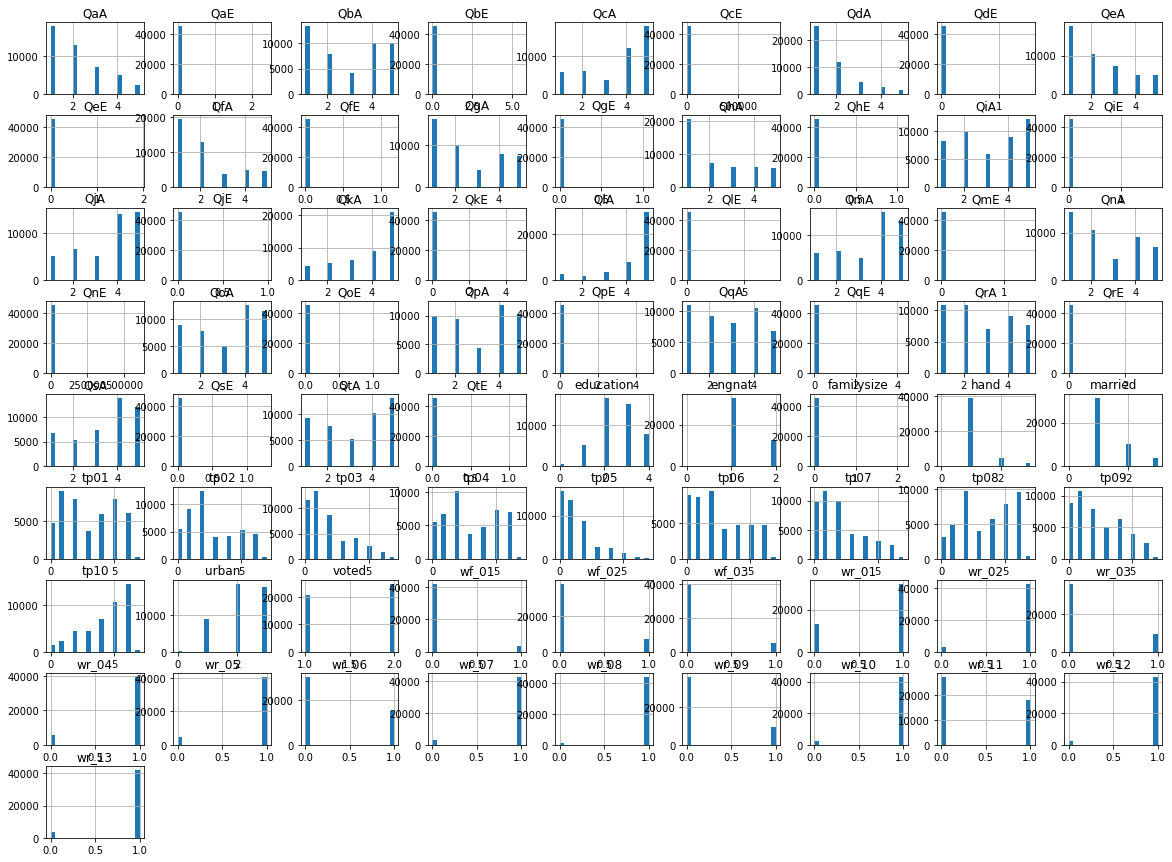

In [19]:
# train 데이터셋의 수치형 변수에 대한 히스토그램
train.hist(bins=20, figsize=(20,15));

### test 히스토그램

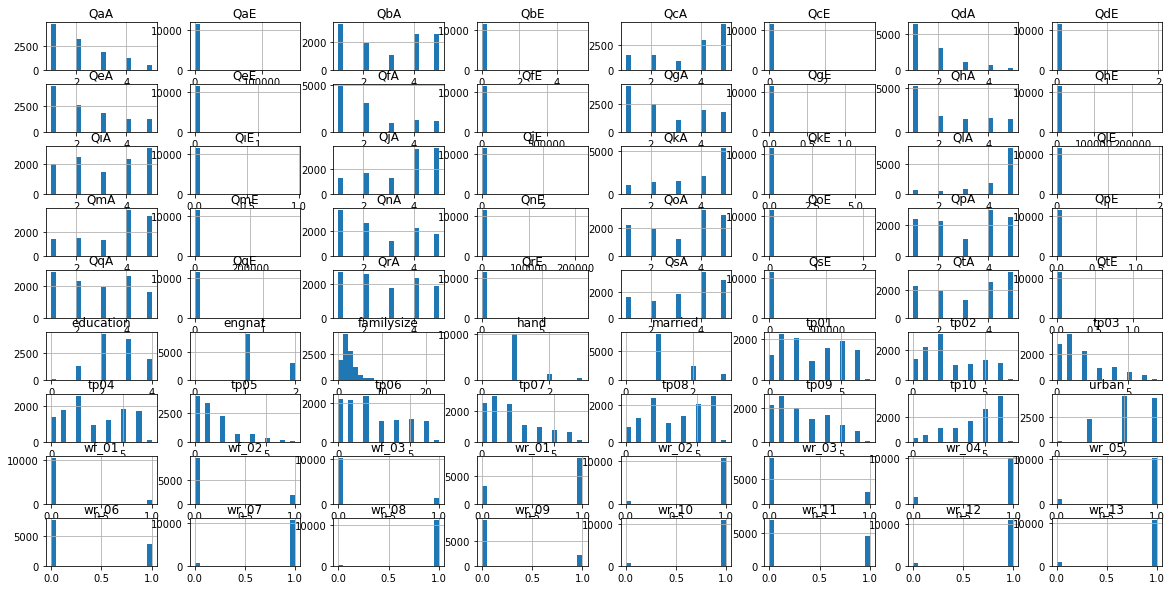

In [20]:
# test 데이터셋의 수치형 변수에 대한 히스토그램
test.hist(bins=20, figsize=(20,10));

- test 데이터셋의 familysize 히스토그램 결과를 보면, 범주형 변수로 보기 어려움 => 확인해볼 필요가 있음

## 범주형 변수 시각화

### train 범주형 countplot

In [21]:
train_o_cols = train.select_dtypes(include="O").columns.tolist()
train_o_cols

['age_group', 'gender', 'race', 'religion']

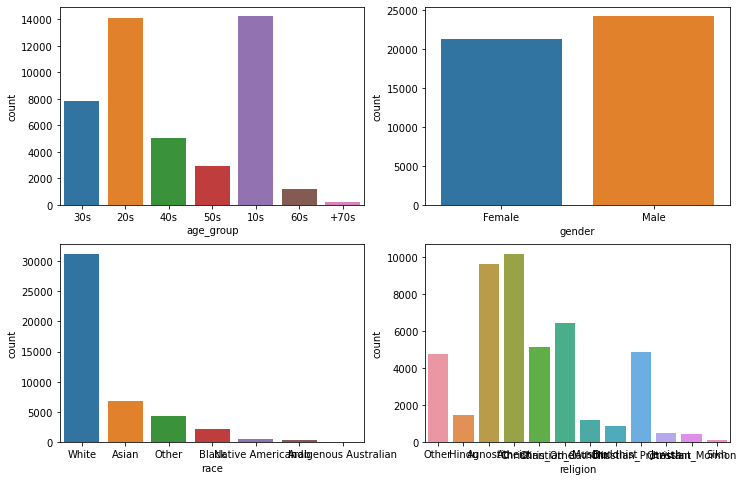

In [22]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

for i, c in enumerate(train_o_cols):
    _ = sns.countplot(data=train, x=c, ax=axes[i//2][i%2])

### test 범주형 countplot

In [23]:
test_o_cols = test.select_dtypes(include="O").columns.tolist()
test_o_cols

['age_group', 'gender', 'race', 'religion']

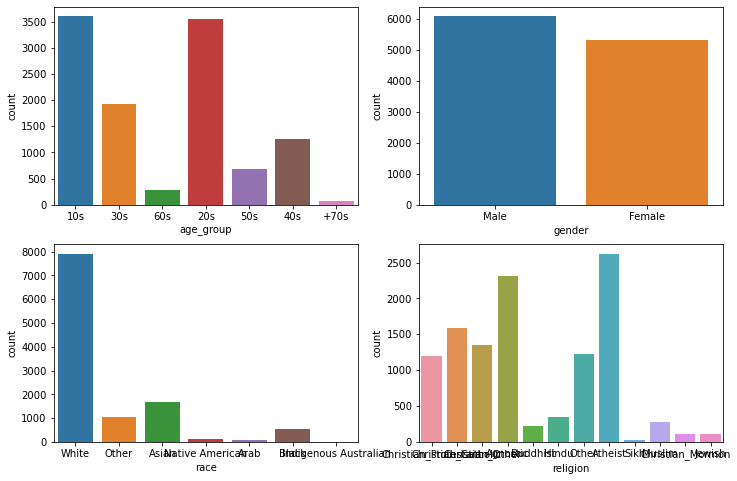

In [24]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

for i, c in enumerate(test_o_cols):
    _ = sns.countplot(data=test, x=c, ax=axes[i//2][i%2])

## 특정컬럼에 대한 countplot

### familysize 

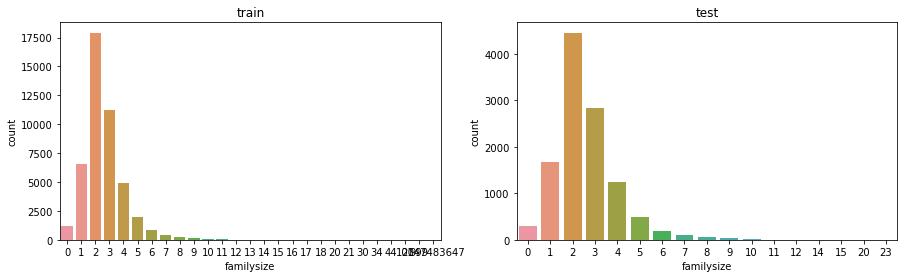

In [25]:
# train, test 데이터셋의 familysize 컬럼에 대한 countplot 그려보기
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

sns.countplot(data=train, x="familysize", ax=axes[0]).set_title("train")
sns.countplot(data=test, x="familysize", ax=axes[1]).set_title("test"); 

In [26]:
print(train["familysize"].value_counts().index)
print("="*85)
print(test["familysize"].value_counts().index)

Int64Index([         2,          3,          1,          4,          5,
                     0,          6,          7,          8,          9,
                    10,         11,         12,         13,         14,
                    15,         44,         17,         21,         20,
                    16,        999, 2147483647,        100,         34,
                    30,         18],
           dtype='int64')
Int64Index([2, 3, 1, 4, 5, 0, 6, 7, 8, 9, 10, 11, 12, 23, 15, 14, 20], dtype='int64')


- familysize가 999, 2147483627 등 현실적으로 불가능한 크기가 입력되어있음 (train 기준)
- 위와 같은 경우와 countplot 결과를 반영하여 **가족이 10명 이상으로 구성된 경우는 기타로 처리**

### 응답 시간
- QaE를 대표로 시각화해 보기

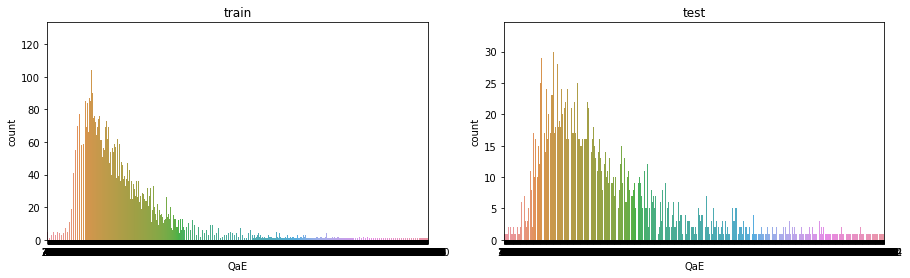

In [27]:
# train, test 데이터셋의 QaE 컬럼에 대한 countplot 그려보기
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

sns.countplot(data=train, x="QaE", ax=axes[0]).set_title("train")
sns.countplot(data=test, x="QaE", ax=axes[1]).set_title("test"); 

- 응답에 걸린 시간은 질문에 대해 이해하는 시간과 고민한 시간을 모두 포함한 것이다.
- 이는 **범위가 매우 커서 로그변환을 취해 범위를 줄이는 작업 또는 cut으로 범위를 분할하는 작업이 필요할 것이라고 판단했다.**

### 나이, 교육, 모국어 영어유무

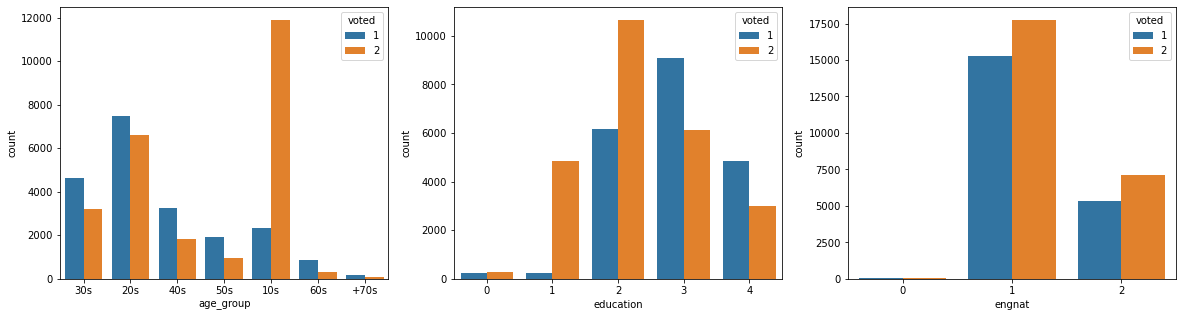

In [28]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,5))

sns.countplot(data=train, x="age_group", hue="voted", ax=axes[0])
sns.countplot(data=train, x="education", hue="voted", ax=axes[1])
sns.countplot(data=train, x="engnat", hue="voted", ax=axes[2]);

# 전처리

## 응답시간 

응답시간은 너무 큰 범위로 구성되어있어서 로그변환의 전처리 과정이 필요하다고 생각

**1. 응답시간만 새로운 리스트에 담아준다.**

In [29]:
# E로 끝나는 컬럼을 찾기 위해 train 데이터의 컬럼들을 리스트로 변환하여 train_cols 변수에 저장
train_cols = train.columns.tolist()
print(train_cols)

['QaA', 'QaE', 'QbA', 'QbE', 'QcA', 'QcE', 'QdA', 'QdE', 'QeA', 'QeE', 'QfA', 'QfE', 'QgA', 'QgE', 'QhA', 'QhE', 'QiA', 'QiE', 'QjA', 'QjE', 'QkA', 'QkE', 'QlA', 'QlE', 'QmA', 'QmE', 'QnA', 'QnE', 'QoA', 'QoE', 'QpA', 'QpE', 'QqA', 'QqE', 'QrA', 'QrE', 'QsA', 'QsE', 'QtA', 'QtE', 'age_group', 'education', 'engnat', 'familysize', 'gender', 'hand', 'married', 'race', 'religion', 'tp01', 'tp02', 'tp03', 'tp04', 'tp05', 'tp06', 'tp07', 'tp08', 'tp09', 'tp10', 'urban', 'voted', 'wf_01', 'wf_02', 'wf_03', 'wr_01', 'wr_02', 'wr_03', 'wr_04', 'wr_05', 'wr_06', 'wr_07', 'wr_08', 'wr_09', 'wr_10', 'wr_11', 'wr_12', 'wr_13']


In [30]:
answer_time_cols = []

for c in train_cols:
    if "E" in c:
        answer_time_cols.append(c)

In [31]:
print(answer_time_cols)

['QaE', 'QbE', 'QcE', 'QdE', 'QeE', 'QfE', 'QgE', 'QhE', 'QiE', 'QjE', 'QkE', 'QlE', 'QmE', 'QnE', 'QoE', 'QpE', 'QqE', 'QrE', 'QsE', 'QtE']


In [32]:
len(answer_time_cols)

20

**2. 로그변환**
- 모든 값이 0이상이기 때문에 로그변환 시, 음수가 들어갈 걱정은 X
- 0인 값이 있기 때문에 log1p로 로그변환

In [33]:
answer_time_log1p = []

for col in answer_time_cols:
    train[f"{col}_log1p"] = np.log1p(train[col])
    answer_time_log1p.append(f"{col}_log1p")

In [34]:
for col in answer_time_cols:
    test[f"{col}_log1p"] = np.log1p(test[col])

In [35]:
train[["QaE", "QaE_log1p", "QbE", "QbE_log1p"]].head()

,QaE,QaE_log1p,QbE,QbE_log1p
index,,,,
0,363,5.897154,1370,7.223296
1,647,6.473891,1313,7.180831
2,1623,7.392648,1480,7.300473
3,504,6.224558,2311,7.745868
4,927,6.833032,707,6.562444


In [36]:
test[["QaE", "QaE_log1p", "QbE", "QbE_log1p"]].head()

,QaE,QaE_log1p,QbE,QbE_log1p
index,,,,
0,736,6.602588,2941,7.986845
1,514,6.244167,1952,7.577122
2,500,6.216606,2507,7.827241
3,669,6.507278,1050,6.957497
4,499,6.214608,1243,7.126087


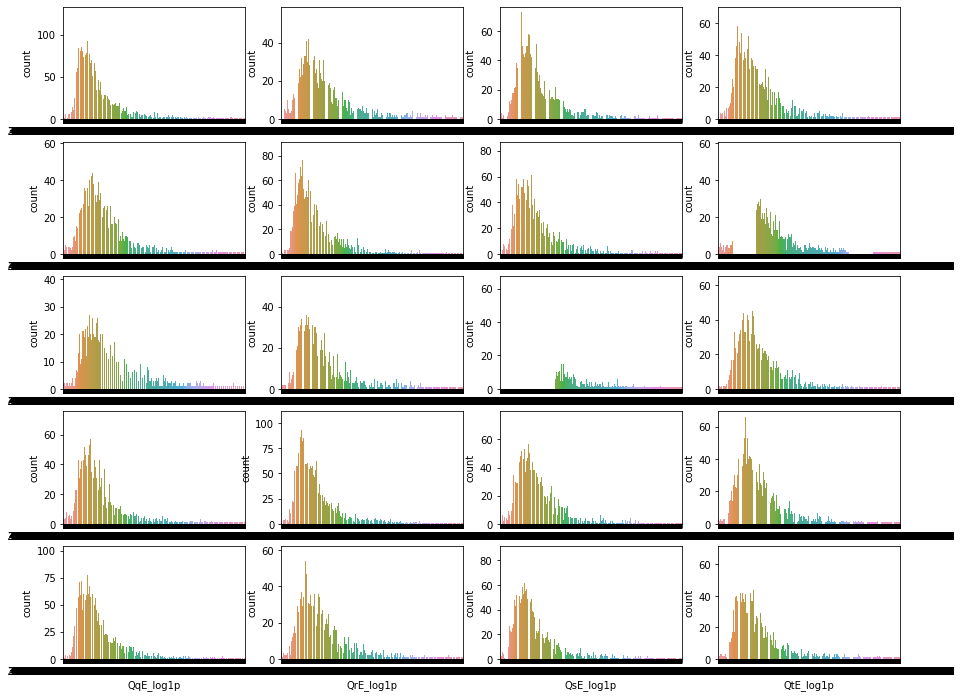

In [37]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(15, 12))

for i, c in enumerate(answer_time_log1p):
    _ = sns.countplot(data=train, x=c, ax=axes[i//4][i%4])

## 나이(age_group)
- 70대 이상 '+' 제거 => 인코딩 시 번호가 앞번호로 생성되기 때문

In [37]:
# train 데이터셋 (+70 -> 70)
train.loc[train["age_group"]=="+70s", "age_group"] = '70s'
display(train["age_group"].value_counts())
print("="*50)
# test 데이터셋 (+70 -> 70)
test.loc[test["age_group"]=="+70s", "age_group"] = '70s'
display(test["age_group"].value_counts())

10s    14215
20s    14112
30s     7836
40s     5051
50s     2889
60s     1194
70s      235
Name: age_group, dtype: int64

10s    3603
20s    3549
30s    1924
40s    1257
50s     692
60s     286
70s      72
Name: age_group, dtype: int64

In [38]:
# age_group -> 라벨인코딩
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train["age_num"] = le.fit_transform(train["age_group"])
test["age_num"] = le.transform(test["age_group"])

## 가족구성원(Family Size)
- 현실적으로 불가능한 데이터가 일부 발견되어 가족구성원이 10을 넘는 경우는 10로 묶을 것임
- 10+ 등으로 바꾸지 않은 이유는 이후 라벨인코딩 시 순서를 맞추기 위해서이다.

In [39]:
train.loc[train["familysize"] > 10, "familysize_num"] = 10
train["familysize_num"].value_counts(ascending=True)

10.0    106
Name: familysize_num, dtype: int64

In [40]:
test.loc[test["familysize"] > 10, "familysize_num"] = 10
test["familysize_num"].value_counts(ascending=True)

10.0    16
Name: familysize_num, dtype: int64

In [41]:
# "familysize_num" -> 라벨인코딩
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train["familysize_num"] = le.fit_transform(train["familysize_num"])
test["familysize_num"] = le.transform(test["familysize_num"])

## 인종 및 종교

In [42]:
print(train["race"].value_counts().sort_values(ascending=False))
print("="*50)
print(test["race"].value_counts().sort_values(ascending=False))

White                    31248
Asian                     6834
Other                     4330
Black                     2168
Native American            548
Arab                       351
Indigenous Australian       53
Name: race, dtype: int64
White                    7918
Asian                    1664
Other                    1053
Black                     537
Native American           117
Arab                       83
Indigenous Australian      11
Name: race, dtype: int64


In [43]:
print(train["religion"].value_counts().sort_values(ascending=False))
print("="*50)
print(test["religion"].value_counts().sort_values(ascending=False))

Atheist                 10192
Agnostic                 9624
Christian_Catholic       6431
Christian_Other          5137
Christian_Protestant     4875
Other                    4770
Hindu                    1429
Muslim                   1192
Buddhist                  850
Jewish                    487
Christian_Mormon          428
Sikh                      117
Name: religion, dtype: int64
Atheist                 2624
Agnostic                2309
Christian_Catholic      1583
Christian_Other         1351
Other                   1225
Christian_Protestant    1196
Hindu                    343
Muslim                   272
Buddhist                 223
Christian_Mormon         112
Jewish                   112
Sikh                      33
Name: religion, dtype: int64


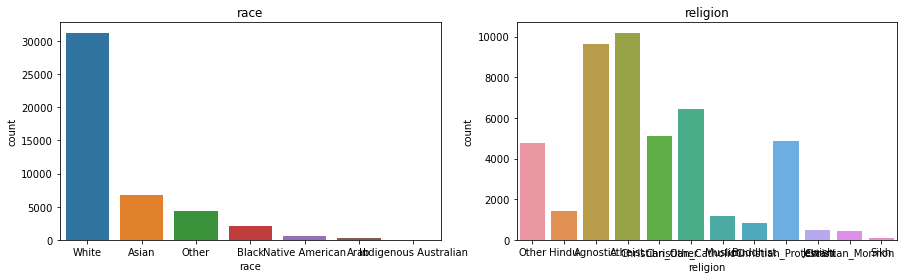

In [44]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

sns.countplot(data=train, x="race", ax=axes[0]).set_title("race")
sns.countplot(data=train, x="religion", ax=axes[1]).set_title("religion");

In [45]:
# race, religion -> 원핫인코딩
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

ohe_arr = ohe.fit_transform(train[["race", "religion"]]).toarray()
ohe_df = pd.DataFrame(ohe_arr, columns=ohe.get_feature_names_out())
ohe_df

,race_Arab,race_Asian,race_Black,race_Indigenous Australian,race_Native American,race_Other,race_White,religion_Agnostic,religion_Atheist,religion_Buddhist,religion_Christian_Catholic,religion_Christian_Mormon,religion_Christian_Other,religion_Christian_Protestant,religion_Hindu,religion_Jewish,religion_Muslim,religion_Other,religion_Sikh
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45527,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
45528,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45529,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
45530,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
df_train = pd.concat([train, ohe_df], axis=1)
df_train.head()

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,age_group,education,engnat,familysize,gender,hand,married,race,religion,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,voted,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13,QaE_log1p,QbE_log1p,QcE_log1p,QdE_log1p,QeE_log1p,QfE_log1p,QgE_log1p,QhE_log1p,QiE_log1p,QjE_log1p,QkE_log1p,QlE_log1p,QmE_log1p,QnE_log1p,QoE_log1p,QpE_log1p,QqE_log1p,QrE_log1p,QsE_log1p,QtE_log1p,age_num,familysize_num,race_Arab,race_Asian,race_Black,race_Indigenous Australian,race_Native American,race_Other,race_White,religion_Agnostic,religion_Atheist,religion_Buddhist,religion_Christian_Catholic,religion_Christian_Mormon,religion_Christian_Other,religion_Christian_Protestant,religion_Hindu,religion_Jewish,religion_Muslim,religion_Other,religion_Sikh
0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,1577,5.0,539,2.0,586,4.0,1095,5.0,1142,4.0,1287,4.0,883,4.0,851,2.0,851,5.0,816,2.0,579,2.0,924,2.0,366,2.0,876,2.0,633,1.0,1115,30s,2,1,4,Female,1,3,White,Other,2,2,2,1,2,1,7,4,4,3,1,2,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1,5.897154,7.223296,6.905753,6.932448,7.363914,6.291569,6.375025,6.999422,7.041412,7.160846,6.784457,6.747587,6.747587,6.705639,6.363028,6.829794,5.905362,6.776507,6.452049,7.017506,2,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,4320,3.0,2190,1.0,826,1.0,4082,5.0,1867,3.0,1264,5.0,2943,4.0,3927,1.0,4329,5.0,1828,1.0,1214,5.0,2414,5.0,1356,1.0,3039,4.0,4304,1.0,1346,20s,4,2,3,Female,1,1,Asian,Hindu,1,1,0,0,1,2,3,4,0,4,3,2,0,0,0,0,1,0,1,1,0,1,1,0,1,0,1,1,6.473891,7.180831,8.127995,7.996317,8.371242,7.692113,6.717805,8.314587,7.532624,7.142827,7.987524,8.275886,8.373323,7.511525,7.102499,7.789455,7.213032,8.019613,8.367532,7.205635,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,1333,1.0,531,4.0,1167,1.0,1016,3.0,2653,2.0,1569,5.0,998,5.0,2547,2.0,918,4.0,2153,2.0,1304,1.0,1131,5.0,937,4.0,1327,1.0,1170,1.0,1409,30s,3,1,3,Male,1,2,White,Other,2,3,1,5,3,4,2,6,1,3,2,1,0,0,1,1,1,0,1,1,0,1,1,1,1,0,1,1,7.392648,7.300473,6.929517,8.124151,7.195937,6.276643,7.063048,6.924612,7.883823,7.358831,6.906755,7.843064,6.823286,7.675082,7.173958,7.031741,6.843750,7.191429,7.065613,7.251345,2,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,357,2.0,1519,4.0,159,3.0,2275,5.0,2809,4.0,5614,3.0,3219,4.0,1296,4.0,9046,4.0,1216,4.0,1169,4.0,23868,3.0,581,4.0,8830,4.0,2392,5.0,1312,20s,4,2,0,Female,1,1,Asian,Hindu,2,4,1,1,1,3,1,3,1,3,3,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1,6.224558,7.745868,6.900731,8.085179,5.880533,7.326466,5.075174,7.730175,7.940940,8.633197,8.077137,7.167809,9.110188,7.104144,7.064759,10.080336,6.366470,9.086024,7.780303,7.180070,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,1014,2.0,628,1.0,991,1.0,1259,5.0,1153,5.0,1388,5.0,740,5.0,1181,4.0,547,2.0,575,1.0,754,4.0,1140,5.0,323,5.0,1070,1.0,583,2.0,1889,20s,3,1,2,Male,1,2,White,Agnostic,1,1,1,6,0,2,0,6,2,6,1,1,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,1,6.833032,6.562444,6.322565,6.968850,6.922644,6.444131,6.899723,7.138867,7.050989,7.236339,6.608001,7.074963,6.306275,6.356108,6.626718,7.039660,5.780744,6.976348,6.369901,7.544332,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
# train데이터에도 원핫인코딩 적용하기
ohe_arr2 = ohe.transform(test[["race", "religion"]]).toarray()
ohe_df2 = pd.DataFrame(ohe_arr2, columns=ohe.get_feature_names_out())
ohe_df2

,race_Arab,race_Asian,race_Black,race_Indigenous Australian,race_Native American,race_Other,race_White,religion_Agnostic,religion_Atheist,religion_Buddhist,religion_Christian_Catholic,religion_Christian_Mormon,religion_Christian_Other,religion_Christian_Protestant,religion_Hindu,religion_Jewish,religion_Muslim,religion_Other,religion_Sikh
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11378,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11379,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11380,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11381,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
df_test = pd.concat([test, ohe_df2], axis=1)
df_test.head()

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,age_group,education,engnat,familysize,gender,hand,married,race,religion,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13,QaE_log1p,QbE_log1p,QcE_log1p,QdE_log1p,QeE_log1p,QfE_log1p,QgE_log1p,QhE_log1p,QiE_log1p,QjE_log1p,QkE_log1p,QlE_log1p,QmE_log1p,QnE_log1p,QoE_log1p,QpE_log1p,QqE_log1p,QrE_log1p,QsE_log1p,QtE_log1p,age_num,familysize_num,race_Arab,race_Asian,race_Black,race_Indigenous Australian,race_Native American,race_Other,race_White,religion_Agnostic,religion_Atheist,religion_Buddhist,religion_Christian_Catholic,religion_Christian_Mormon,religion_Christian_Other,religion_Christian_Protestant,religion_Hindu,religion_Jewish,religion_Muslim,religion_Other,religion_Sikh
0,3.0,736,2.0,2941,3.0,4621,1.0,4857,2.0,2550,4.0,3171,5.0,3613,2.0,1494,4.0,1597,2.0,8891,5.0,2416,3.0,2043,3.0,3445,5.0,1232,3.0,1152,4.0,1447,3.0,798,4.0,1054,1.0,3462,2.0,1621,10s,2,2,3,Male,1,1,White,Christian_Protestant,2,1,1,4,1,2,2,3,4,4,2,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,1,6.602588,7.986845,8.438583,8.488382,7.844241,8.062118,8.192570,7.309881,7.376508,9.092907,7.790282,7.622664,8.144969,7.117206,7.050123,7.277939,6.683361,6.961296,8.149891,7.391415,0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,3.0,514,2.0,1952,3.0,1552,3.0,821,4.0,1150,1.0,605,2.0,601,1.0,2370,5.0,2268,3.0,1759,5.0,771,5.0,1124,3.0,4525,1.0,559,2.0,988,3.0,1014,4.0,380,5.0,995,3.0,629,4.0,708,10s,2,2,2,Male,2,1,Other,Christian_Catholic,7,7,7,7,7,7,7,7,7,7,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.244167,7.577122,7.347944,6.711740,7.048386,6.406880,6.400257,7.771067,7.727094,7.473069,6.648985,7.025538,8.417594,6.327937,6.896694,6.922644,5.942799,6.903747,6.445720,6.563856,0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,500,2.0,2507,4.0,480,2.0,614,2.0,1326,2.0,767,1.0,799,1.0,1309,2.0,3317,4.0,766,4.0,1940,5.0,926,4.0,568,2.0,608,5.0,669,3.0,2417,3.0,710,4.0,2781,3.0,1110,5.0,1073,30s,3,2,7,Male,1,2,Other,Christian_Other,6,2,3,0,6,1,2,2,4,1,1,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1,6.216606,7.827241,6.175867,6.421622,7.190676,6.643790,6.684612,7.177782,8.107117,6.642487,7.570959,6.831954,6.343880,6.411818,6.507278,7.790696,6.566672,7.930925,7.013016,6.979145,2,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,669,1.0,1050,5.0,1435,2.0,2252,5.0,2533,1.0,578,1.0,742,1.0,2886,1.0,1379,1.0,1392,3.0,2855,5.0,697,4.0,573,1.0,412,2.0,1076,4.0,1445,5.0,1069,1.0,847,4.0,1126,1.0,1240,60s,4,1,4,Male,1,2,White,Christian_Catholic,0,5,1,6,0,6,0,5,1,6,2,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,6.507278,6.957497,7.269617,7.720018,7.837554,6.361302,6.610696,7.967973,7.229839,7.239215,7.957177,6.548219,6.352629,6.023448,6.981935,7.276556,6.975414,6.742881,7.027315,7.123673,5,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,499,1.0,1243,5.0,845,2.0,1666,2.0,925,2.0,413,5.0,361,1.0,995,2.0,1427,3.0,1093,5.0,1201,4.0,1264,2.0,943,4.0,475,2.0,787,4.0,607,3.0,529,4.0,947,4.0,524,3.0,1945,10s,2,1,3,Male,1,1,White,Agnostic,6,1,2,2,3,0,5,2,4,3,2,0,0,0,1,1,0,1,1,0,1,1,0,1,1,1,1,6.214608,7.126087,6.740519,7.418781,6.830874,6.025866,5.891644,6.903747,7.264030,6.997596,7.091742,7.142827,6.850126,6.165418,6.669498,6.410175,6.272877,6.854355,6.263398,7.573531,0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 성별(gender)

In [49]:
print(train["gender"].value_counts())
print("="*50)
print(test["gender"].value_counts())

Male      24217
Female    21315
Name: gender, dtype: int64
Male      6072
Female    5311
Name: gender, dtype: int64


In [50]:
# gender(성별) -> 원핫인코딩으로 전처리

df_train_gen = pd.get_dummies(data=train["gender"], drop_first=True)
df_test_gen = pd.get_dummies(data=test["gender"], drop_first=True)

In [51]:
display(df_train[["gender"]].head())
display(df_train_gen.head())

,gender
0,Female
1,Female
2,Male
3,Female
4,Male


,Male
index,
0,0
1,0
2,1
3,0
4,1


In [52]:
display(df_test[["gender"]].tail())
display(df_test_gen.tail())

,gender
11378,Female
11379,Female
11380,Male
11381,Female
11382,Female


,Male
index,
11378,0
11379,0
11380,1
11381,0
11382,0


In [53]:
# 컬럼명 추가 Male -> gender_num
df_train_gen["gender_num"] = df_train_gen["Male"]
df_test_gen["gender_num"] = df_test_gen["Male"]

In [54]:
df_train = pd.concat([df_train, df_train_gen], axis=1)
df_test = pd.concat([df_test, df_test_gen], axis=1)

In [55]:
df_train.head()

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,age_group,education,engnat,familysize,gender,hand,married,race,religion,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,voted,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13,QaE_log1p,QbE_log1p,QcE_log1p,QdE_log1p,QeE_log1p,QfE_log1p,QgE_log1p,QhE_log1p,QiE_log1p,QjE_log1p,QkE_log1p,QlE_log1p,QmE_log1p,QnE_log1p,QoE_log1p,QpE_log1p,QqE_log1p,QrE_log1p,QsE_log1p,QtE_log1p,age_num,familysize_num,race_Arab,race_Asian,race_Black,race_Indigenous Australian,race_Native American,race_Other,race_White,religion_Agnostic,religion_Atheist,religion_Buddhist,religion_Christian_Catholic,religion_Christian_Mormon,religion_Christian_Other,religion_Christian_Protestant,religion_Hindu,religion_Jewish,religion_Muslim,religion_Other,religion_Sikh,Male,gender_num
0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,1577,5.0,539,2.0,586,4.0,1095,5.0,1142,4.0,1287,4.0,883,4.0,851,2.0,851,5.0,816,2.0,579,2.0,924,2.0,366,2.0,876,2.0,633,1.0,1115,30s,2,1,4,Female,1,3,White,Other,2,2,2,1,2,1,7,4,4,3,1,2,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1,5.897154,7.223296,6.905753,6.932448,7.363914,6.291569,6.375025,6.999422,7.041412,7.160846,6.784457,6.747587,6.747587,6.705639,6.363028,6.829794,5.905362,6.776507,6.452049,7.017506,2,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0
1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,4320,3.0,2190,1.0,826,1.0,4082,5.0,1867,3.0,1264,5.0,2943,4.0,3927,1.0,4329,5.0,1828,1.0,1214,5.0,2414,5.0,1356,1.0,3039,4.0,4304,1.0,1346,20s,4,2,3,Female,1,1,Asian,Hindu,1,1,0,0,1,2,3,4,0,4,3,2,0,0,0,0,1,0,1,1,0,1,1,0,1,0,1,1,6.473891,7.180831,8.127995,7.996317,8.371242,7.692113,6.717805,8.314587,7.532624,7.142827,7.987524,8.275886,8.373323,7.511525,7.102499,7.789455,7.213032,8.019613,8.367532,7.205635,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0
2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,1333,1.0,531,4.0,1167,1.0,1016,3.0,2653,2.0,1569,5.0,998,5.0,2547,2.0,918,4.0,2153,2.0,1304,1.0,1131,5.0,937,4.0,1327,1.0,1170,1.0,1409,30s,3,1,3,Male,1,2,White,Other,2,3,1,5,3,4,2,6,1,3,2,1,0,0,1,1,1,0,1,1,0,1,1,1,1,0,1,1,7.392648,7.300473,6.929517,8.124151,7.195937,6.276643,7.063048,6.924612,7.883823,7.358831,6.906755,7.843064,6.823286,7.675082,7.173958,7.031741,6.843750,7.191429,7.065613,7.251345,2,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1
3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,357,2.0,1519,4.0,159,3.0,2275,5.0,2809,4.0,5614,3.0,3219,4.0,1296,4.0,9046,4.0,1216,4.0,1169,4.0,23868,3.0,581,4.0,8830,4.0,2392,5.0,1312,20s,4,2,0,Female,1,1,Asian,Hindu,2,4,1,1,1,3,1,3,1,3,3,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1,6.224558,7.745868,6.900731,8.085179,5.880533,7.326466,5.075174,7.730175,7.940940,8.633197,8.077137,7.167809,9.110188,7.104144,7.064759,10.080336,6.366470,9.086024,7.780303,7.180070,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0
4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,1014,2.0,628,1.0,991,1.0,1259,5.0,1153,5.0,1388,5.0,740,5.0,1181,4.0,547,2.0,575,1.0,754,4.0,1140,5.0,323,5.0,1070,1.0,583,2.0,1889,20s,3,1,2,Male,1,2,White,Agnostic,1,1,1,6,0,2,0,6,2,6,1,1,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,1,6.833032,6.562444,6.322565,6.968850,6.922644,6.444131,6.899723,7.138867,7.050989,7.236339,6.608001,7.074963,6.306275,6.356108,6.626718,7.039660,5.780744,6.976348,6.369901,7.544332,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1


In [56]:
df_test.head()

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,age_group,education,engnat,familysize,gender,hand,married,race,religion,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13,QaE_log1p,QbE_log1p,QcE_log1p,QdE_log1p,QeE_log1p,QfE_log1p,QgE_log1p,QhE_log1p,QiE_log1p,QjE_log1p,QkE_log1p,QlE_log1p,QmE_log1p,QnE_log1p,QoE_log1p,QpE_log1p,QqE_log1p,QrE_log1p,QsE_log1p,QtE_log1p,age_num,familysize_num,race_Arab,race_Asian,race_Black,race_Indigenous Australian,race_Native American,race_Other,race_White,religion_Agnostic,religion_Atheist,religion_Buddhist,religion_Christian_Catholic,religion_Christian_Mormon,religion_Christian_Other,religion_Christian_Protestant,religion_Hindu,religion_Jewish,religion_Muslim,religion_Other,religion_Sikh,Male,gender_num
0,3.0,736,2.0,2941,3.0,4621,1.0,4857,2.0,2550,4.0,3171,5.0,3613,2.0,1494,4.0,1597,2.0,8891,5.0,2416,3.0,2043,3.0,3445,5.0,1232,3.0,1152,4.0,1447,3.0,798,4.0,1054,1.0,3462,2.0,1621,10s,2,2,3,Male,1,1,White,Christian_Protestant,2,1,1,4,1,2,2,3,4,4,2,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,1,6.602588,7.986845,8.438583,8.488382,7.844241,8.062118,8.192570,7.309881,7.376508,9.092907,7.790282,7.622664,8.144969,7.117206,7.050123,7.277939,6.683361,6.961296,8.149891,7.391415,0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1
1,3.0,514,2.0,1952,3.0,1552,3.0,821,4.0,1150,1.0,605,2.0,601,1.0,2370,5.0,2268,3.0,1759,5.0,771,5.0,1124,3.0,4525,1.0,559,2.0,988,3.0,1014,4.0,380,5.0,995,3.0,629,4.0,708,10s,2,2,2,Male,2,1,Other,Christian_Catholic,7,7,7,7,7,7,7,7,7,7,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.244167,7.577122,7.347944,6.711740,7.048386,6.406880,6.400257,7.771067,7.727094,7.473069,6.648985,7.025538,8.417594,6.327937,6.896694,6.922644,5.942799,6.903747,6.445720,6.563856,0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
2,3.0,500,2.0,2507,4.0,480,2.0,614,2.0,1326,2.0,767,1.0,799,1.0,1309,2.0,3317,4.0,766,4.0,1940,5.0,926,4.0,568,2.0,608,5.0,669,3.0,2417,3.0,710,4.0,2781,3.0,1110,5.0,1073,30s,3,2,7,Male,1,2,Other,Christian_Other,6,2,3,0,6,1,2,2,4,1,1,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1,6.216606,7.827241,6.175867,6.421622,7.190676,6.643790,6.684612,7.177782,8.107117,6.642487,7.570959,6.831954,6.343880,6.411818,6.507278,7.790696,6.566672,7.930925,7.013016,6.979145,2,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
3,1.0,669,1.0,1050,5.0,1435,2.0,2252,5.0,2533,1.0,578,1.0,742,1.0,2886,1.0,1379,1.0,1392,3.0,2855,5.0,697,4.0,573,1.0,412,2.0,1076,4.0,1445,5.0,1069,1.0,847,4.0,1126,1.0,1240,60s,4,1,4,Male,1,2,White,Christian_Catholic,0,5,1,6,0,6,0,5,1,6,2,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,6.507278,6.957497,7.269617,7.720018,7.837554,6.361302,6.610696,7.967973,7.229839,7.239215,7.957177,6.548219,6.352629,6.023448,6.981935,7.276556,6.975414,6.742881,7.027315,7.123673,5,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
4,2.0,499,1.0,1243,5.0,845,2.0,1666,2.0,925,2.0,413,5.0,361,1.0,995,2.0,1427,3.0,1093,5.0,1201,4.0,1264,2.0,943,4.0,475,2.0,787,4.0,607,3.0,529,4.0,947,4.0,524,3.0,1945,10s,2,1,3,Male,1,1,White,Agnostic,6,1,2,2,3,0,5,2,4,3,2,0,0,0,1,1,0,1,1,0,1,1,0,1,1,1,1,6.214608,7.126087,6.740519,7.418781,6.830874,6.025866,5.891644,6.903747,7.264030,6.997596,7.091742,7.142827,6.850126,6.165418,6.669498,6.410175,6.272877,6.854355,6.263398,7.573531,0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1


# 머신러닝 모델

모델을 예측하는데 사용할 컬럼은 아래와 같다.

- 질문에 대한 답변 (Qa~Qt A)
- education(교육)
- engnat()
- age_num(나이)
- familysize_num(가족 구성원)
- gender_num(성별)
- hand(손잡이)
- 원핫인코딩한 인종 및 종교 컬럼
- tp 1 ~ 10
- urban(유년기 거주관련)

## 모델에 사용할 피처 정의

In [57]:
cols = df_train.columns.to_list()

for c in answer_time_cols:
    cols.remove(c)

In [58]:
print(cols)

['QaA', 'QbA', 'QcA', 'QdA', 'QeA', 'QfA', 'QgA', 'QhA', 'QiA', 'QjA', 'QkA', 'QlA', 'QmA', 'QnA', 'QoA', 'QpA', 'QqA', 'QrA', 'QsA', 'QtA', 'age_group', 'education', 'engnat', 'familysize', 'gender', 'hand', 'married', 'race', 'religion', 'tp01', 'tp02', 'tp03', 'tp04', 'tp05', 'tp06', 'tp07', 'tp08', 'tp09', 'tp10', 'urban', 'voted', 'wf_01', 'wf_02', 'wf_03', 'wr_01', 'wr_02', 'wr_03', 'wr_04', 'wr_05', 'wr_06', 'wr_07', 'wr_08', 'wr_09', 'wr_10', 'wr_11', 'wr_12', 'wr_13', 'QaE_log1p', 'QbE_log1p', 'QcE_log1p', 'QdE_log1p', 'QeE_log1p', 'QfE_log1p', 'QgE_log1p', 'QhE_log1p', 'QiE_log1p', 'QjE_log1p', 'QkE_log1p', 'QlE_log1p', 'QmE_log1p', 'QnE_log1p', 'QoE_log1p', 'QpE_log1p', 'QqE_log1p', 'QrE_log1p', 'QsE_log1p', 'QtE_log1p', 'age_num', 'familysize_num', 'race_Arab', 'race_Asian', 'race_Black', 'race_Indigenous Australian', 'race_Native American', 'race_Other', 'race_White', 'religion_Agnostic', 'religion_Atheist', 'religion_Buddhist', 'religion_Christian_Catholic', 'religion_Chr

In [59]:
# 정답값 예측에 사용할 피처 리스트
feature_names = ['QaA', 'QbA', 'QcA', 'QdA', 'QeA', 'QfA', 'QgA'
                 , 'QhA', 'QiA', 'QjA', 'QkA', 'QlA', 'QmA', 'QnA'
                 , 'QoA', 'QpA', 'QqA', 'QrA', 'QsA', 'QtA', 'education'
                 , 'engnat', 'hand', 'married', 'tp01', 'tp02'
                 , 'tp03', 'tp04', 'tp05', 'tp06', 'tp07', 'tp08', 'tp09'
                 , 'tp10', 'age_num', 'familysize_num', 'gender_num', 'race_Arab'
                 , 'race_Asian', 'race_Black', 'race_Indigenous Australian'
                 , 'race_Native American', 'race_Other', 'race_White', 'religion_Agnostic'
                 , 'religion_Atheist', 'religion_Buddhist'
                 , 'religion_Christian_Catholic', 'religion_Christian_Mormon'
                 , 'religion_Christian_Other', 'religion_Christian_Protestant'
                 , 'religion_Hindu', 'religion_Jewish', 'religion_Muslim'
                 , 'religion_Other', 'religion_Sikh', 'QaE_log1p', 'QbE_log1p'
                 , 'QcE_log1p', 'QdE_log1p', 'QeE_log1p', 'QfE_log1p'
                 , 'QgE_log1p', 'QhE_log1p', 'QiE_log1p', 'QjE_log1p'
                 , 'QkE_log1p', 'QlE_log1p', 'QmE_log1p', 'QnE_log1p'
                 , 'QoE_log1p', 'QpE_log1p', 'QqE_log1p', 'QrE_log1p', 'QsE_log1p', 'QtE_log1p']
print(feature_names)

['QaA', 'QbA', 'QcA', 'QdA', 'QeA', 'QfA', 'QgA', 'QhA', 'QiA', 'QjA', 'QkA', 'QlA', 'QmA', 'QnA', 'QoA', 'QpA', 'QqA', 'QrA', 'QsA', 'QtA', 'education', 'engnat', 'hand', 'married', 'tp01', 'tp02', 'tp03', 'tp04', 'tp05', 'tp06', 'tp07', 'tp08', 'tp09', 'tp10', 'age_num', 'familysize_num', 'gender_num', 'race_Arab', 'race_Asian', 'race_Black', 'race_Indigenous Australian', 'race_Native American', 'race_Other', 'race_White', 'religion_Agnostic', 'religion_Atheist', 'religion_Buddhist', 'religion_Christian_Catholic', 'religion_Christian_Mormon', 'religion_Christian_Other', 'religion_Christian_Protestant', 'religion_Hindu', 'religion_Jewish', 'religion_Muslim', 'religion_Other', 'religion_Sikh', 'QaE_log1p', 'QbE_log1p', 'QcE_log1p', 'QdE_log1p', 'QeE_log1p', 'QfE_log1p', 'QgE_log1p', 'QhE_log1p', 'QiE_log1p', 'QjE_log1p', 'QkE_log1p', 'QlE_log1p', 'QmE_log1p', 'QnE_log1p', 'QoE_log1p', 'QpE_log1p', 'QqE_log1p', 'QrE_log1p', 'QsE_log1p', 'QtE_log1p']


In [60]:
# 정답값 
label_name = "voted"
label_name

'voted'

## 데이터셋 만들기
- 학습과 예측에 사용할 데이터셋 만들기

In [61]:
# train, test 데이터셋 나누기
X_train = df_train[feature_names]
X_test = df_test[feature_names]

print(X_train.shape, X_test.shape)

(45532, 76) (11383, 76)


In [62]:
# y_train 만들기 - 학습에 사용할 정답값 예) 기출문제의 정답
y_train = df_train[label_name]
y_train.shape

(45532,)

## 랜덤포레스트

In [65]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=42, n_jobs=-1)
rfc

RandomForestClassifier(n_jobs=-1, random_state=42)

## 교차검증(cross validation)

In [66]:
from sklearn.model_selection import cross_val_predict

y_valid_pred = cross_val_predict(rfc, X_train, y_train, cv=5, n_jobs=-1, verbose=2)
y_valid_pred

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   10.2s remaining:   15.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   10.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   10.2s finished


array([1, 1, 1, ..., 2, 1, 1])

### 정확도 예측

In [67]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_train, y_valid_pred)
accuracy

0.6859351664763244

## 모델 학습 및 예측

In [68]:
y_predict = rfc.fit(X_train, y_train).predict(X_test)
y_predict

array([2, 2, 2, ..., 1, 1, 2])

## 피처 중요도 

In [69]:
rfc.feature_importances_

array([7.91773874e-03, 8.92418548e-03, 7.75418715e-03, 6.85134815e-03,
       8.66468777e-03, 7.56987840e-03, 8.29439830e-03, 8.24792030e-03,
       8.59142977e-03, 8.31964743e-03, 7.80446069e-03, 6.44779762e-03,
       8.53488566e-03, 8.13261518e-03, 8.21958902e-03, 8.70680092e-03,
       1.09240682e-02, 8.96367587e-03, 8.52613546e-03, 8.68325299e-03,
       5.90606749e-02, 4.61120425e-03, 3.77711422e-03, 2.17254121e-02,
       1.17913677e-02, 1.13369189e-02, 1.11151121e-02, 1.19049736e-02,
       9.66791316e-03, 1.17065057e-02, 1.10840302e-02, 1.21513355e-02,
       1.18905182e-02, 1.08018709e-02, 8.76673914e-02, 1.04884397e-04,
       3.56708981e-03, 3.36487053e-04, 7.62191507e-03, 1.12417174e-03,
       6.29826931e-05, 5.16647111e-04, 1.74385081e-03, 1.06603940e-02,
       3.10795948e-03, 2.96504531e-03, 9.59511697e-04, 2.74580077e-03,
       4.27463777e-04, 2.37592671e-03, 3.27234138e-03, 9.18520361e-04,
       5.10703553e-04, 1.00331031e-03, 3.35209997e-03, 1.37701744e-04,
      

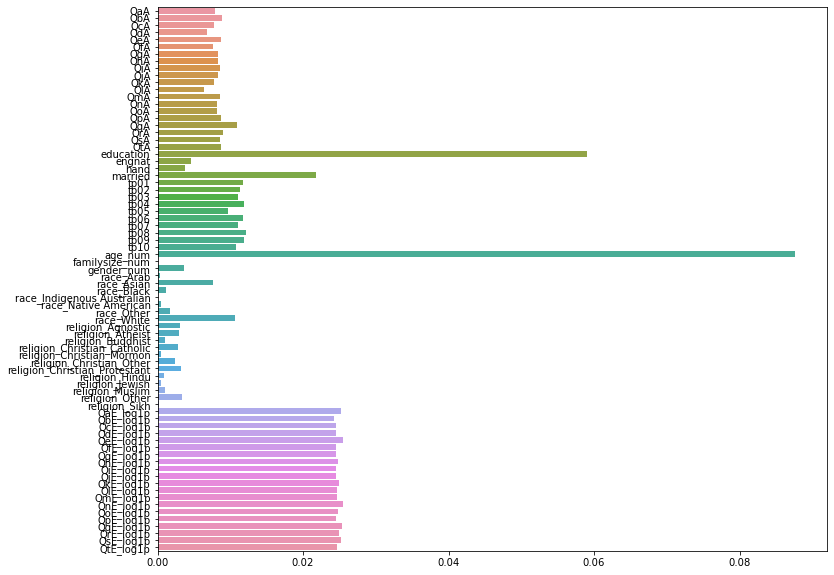

In [70]:
# 피처 중요도 시각화 하기
plt.figure(figsize=(12, 10))
sns.barplot(x=rfc.feature_importances_, y=rfc.feature_names_in_);

# 제출

In [71]:
submit = pd.read_csv(file_names[-1], index_col="index")
submit.head()

,voted
index,
0,0
1,0
2,0
3,0
4,0


In [72]:
submit["voted"] = y_predict
submit.head()

,voted
index,
0,2
1,2
2,2
3,1
4,2


In [73]:
# 제출용 데이터 저장 경로
save_name = f"data/submit_{accuracy:.5f}.csv"
save_name

'data/submit_0.68594.csv'

In [74]:
submit.to_csv(save_name)

In [75]:
pd.read_csv(save_name, index_col="index")

,voted
index,
0,2
1,2
2,2
3,1
4,2
...,...
11378,2
11379,2
11380,1
